In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
%matplotlib inline


In [16]:
path='scores_1.xlsx'
train=pd.read_excel(path, sheetname='Matrix with data')


C:\Users\sandhya\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [17]:
test=pd.read_excel(path, sheetname='test data')

C:\Users\sandhya\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [18]:
train.head()

,sku,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99,Feature 100,Feature 101,Feature 102
0,Prod 1,1.7,1.3,1.9,1.8,1.7,1.5,4.1,2.3,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9
1,Prod 2,1.5,1.7,1.9,1.8,1.7,1.5,3.9,2.3,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9
2,Prod 3,1.7,1.3,1.9,1.8,1.7,1.5,3.8,2.3,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9
3,Prod 4,1.7,1.3,1.9,1.8,1.7,1.5,2.5,2.3,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9
4,Prod 5,1.7,1.3,1.9,1.8,1.7,1.5,2.2,2.3,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9


In [19]:
test.head()

,sku,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99,Feature 100,Feature 101,Feature 102
0,Prod 1,1.7,1.3,4.0,1.8,4.0,1.5,4.1,4.0,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,1.8,1.9
1,Prod 41,1.5,2.0,1.7,1.5,1.8,1.9,3.0,2.1,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,2.1,2.1
2,Prod 16,1.7,1.3,1.5,1.9,1.7,1.6,2.2,2.1,2.2,...,2.3,2.3,1.9,1.8,1.7,2.1,2.2,2.3,2.1,1.9


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 103 entries, sku to Feature 102
dtypes: float64(102), object(1)
memory usage: 60.4+ KB


In [21]:
train.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99,Feature 100,Feature 101,Feature 102
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1.628000,1.494667,1.773333,1.717333,1.732000,1.641333,2.886667,2.424000,2.690667,2.174667,...,2.273333,2.305333,1.898667,1.941333,1.750667,2.137333,2.244000,2.317333,2.222667,2.065333
std,0.096646,0.180010,0.159673,0.153670,0.046962,0.181654,0.935824,0.535709,0.836850,0.556799,...,0.321034,0.307076,0.381495,0.636734,0.369577,0.323316,0.312029,0.257521,0.597195,0.255477
min,1.500000,1.300000,1.300000,1.500000,1.700000,1.500000,1.900000,2.100000,2.100000,1.900000,...,2.100000,2.200000,1.700000,1.700000,1.700000,2.100000,2.200000,2.200000,1.800000,1.900000
25%,1.500000,1.300000,1.700000,1.500000,1.700000,1.500000,2.100000,2.100000,2.200000,1.900000,...,2.100000,2.200000,1.700000,1.700000,1.700000,2.100000,2.200000,2.300000,2.100000,1.900000
50%,1.700000,1.500000,1.900000,1.800000,1.700000,1.500000,2.200000,2.300000,2.200000,1.900000,...,2.300000,2.300000,1.900000,1.800000,1.700000,2.100000,2.200000,2.300000,2.100000,2.100000
75%,1.700000,1.700000,1.900000,1.800000,1.800000,1.900000,3.900000,2.400000,3.850000,2.300000,...,2.300000,2.300000,1.900000,1.800000,1.700000,2.100000,2.200000,2.300000,2.100000,2.100000
max,1.700000,1.900000,1.900000,1.900000,1.800000,1.900000,4.100000,4.100000,4.100000,4.900000,...,4.900000,4.900000,4.900000,4.900000,4.900000,4.900000,4.900000,4.500000,4.600000,4.100000


In [22]:
train_d= train.drop('sku', axis=1)
test_d= test.drop('sku', axis=1)

In [23]:
train_d.shape

(75, 102)

In [24]:
test_d.shape

(3, 102)

In [26]:
train_sub= train[['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F65B399550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F65B765400>]], dtype=object)

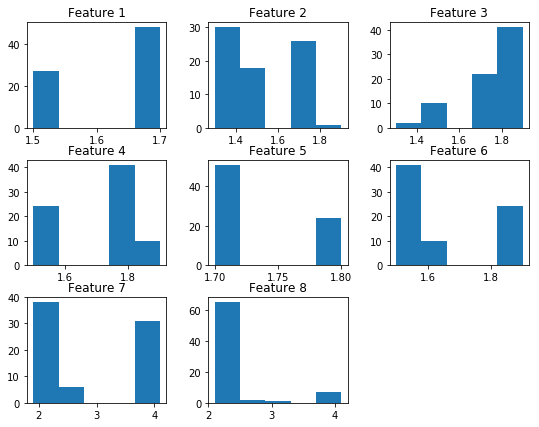

In [27]:
train_sub.hist(bins=5,figsize=(9,7),grid=False)

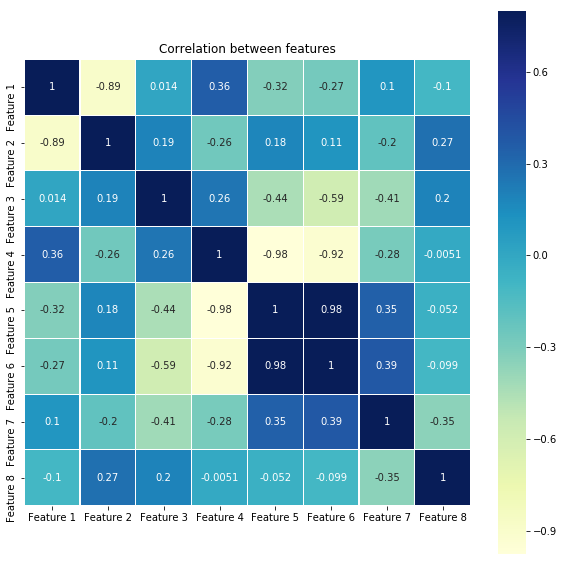

In [29]:
corr=train_sub.corr()
plt.figure(figsize=(10, 10)) 
 
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white") 
plt.title('Correlation between features');

In [30]:
def Distance_metrics(method):
    print(method)
    distance=cdist(train_d,test_d,method)
    df=pd.DataFrame(distance,index=None)
    for i in range(0,len(test)):
        ind=df[i].argsort().values[:3]
        print('\n'+'Test case : '+str(i))
        print('Actual product taken as test case:'+test.iloc[i,0]+'\n'+'\n'+'Products to be recommended:')
        print(train.iloc[ind,0])
   

In [37]:
if __name__ == '__main__':
    Distance_metrics('correlation')
    print("\n"+"############################################"+"\n")
    Distance_metrics('cosine')


correlation

Test case : 0
Actual product taken as test case: Prod 1

Products to be recommended:
0     Prod 1
2     Prod 3
1     Prod 2
Name: sku, dtype: object

Test case : 1
Actual product taken as test case:Prod 41

Products to be recommended:
39    Prod 40
40    Prod 41
41    Prod 42
Name: sku, dtype: object

Test case : 2
Actual product taken as test case:Prod 16

Products to be recommended:
16    Prod 17
11    Prod 12
22    Prod 23
Name: sku, dtype: object

############################################

cosine

Test case : 0
Actual product taken as test case: Prod 1

Products to be recommended:
0     Prod 1
2     Prod 3
1     Prod 2
Name: sku, dtype: object

Test case : 1
Actual product taken as test case:Prod 41

Products to be recommended:
39    Prod 40
40    Prod 41
41    Prod 42
Name: sku, dtype: object

Test case : 2
Actual product taken as test case:Prod 16

Products to be recommended:
16    Prod 17
11    Prod 12
22    Prod 23
Name: sku, dtype: object
